# Image Demosaicing

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from colour_demosaicing import masks_CFA_Bayer
from timeit import default_timer as timer
from nonten import nonten
from nonten_BPCG import nonten_BPCG

from utils import plot_channel, the_to_q, q_to_the

In [2]:
shape = (90, 60)
start = (100, 100)
image = imread('image/oski.png', 'png')   
image = image[start[0]:start[0]+shape[0], start[1]:start[1]+shape[1], :]

bayer_filter = np.stack(masks_CFA_Bayer(shape), axis=-1).astype(float)
mosaic_image = image * bayer_filter

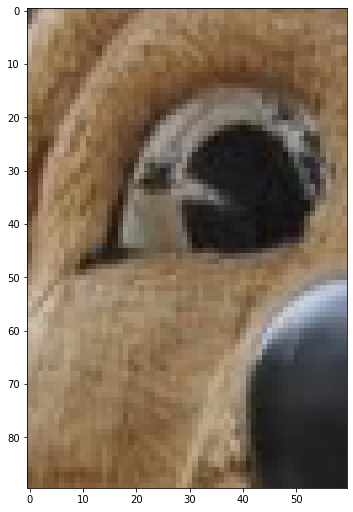

In [3]:
fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
ax.imshow(image)

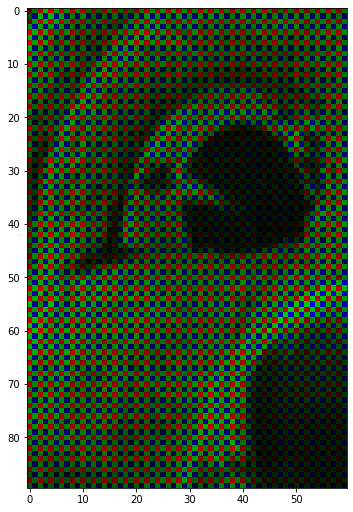

In [4]:
fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
ax.imshow(mosaic_image)

In [5]:
X = np.argwhere(bayer_filter.flatten() == 1).flatten()
Y = mosaic_image.flatten()[X]
r = mosaic_image.shape

rng = np.random.default_rng(112)

In [6]:
out = nonten(X, Y, r, rng, lpar = 10, tol = 1e-6, verbose = True, indices=False, pattern=False, sparse=False, nag=False)

Set parameter Username

   Active Sets   |           Objective Bounds            |         Work
  Size    Drops  |  Incumbent       BestBd       AddGap  |  SiGD  IntPrg   Time

     2        0     2.879e-02    0.000e+00    2.879e-02        0      1      0s
     3        0     2.402e-02    0.000e+00    2.402e-02        0      1      5s
    36        1     4.513e-03    0.000e+00    4.513e-03      186      1     10s
    66        8     2.450e-03    0.000e+00    2.450e-03      310      1     15s
    99       13     1.553e-03    0.000e+00    1.553e-03      381      1     20s
   138       17     1.047e-03    0.000e+00    1.047e-03      412      1     25s
   153       19     8.906e-04    0.000e+00    8.906e-04      421      1     32s
   156       19     8.625e-04    0.000e+00    8.625e-04      423      1     40s
   155       20     8.237e-04    0.000e+00    8.237e-04     1102      1     45s
   162       21     7.768e-04    0.000e+00    7.768e-04     1696      1     50s
   168       22     7.3

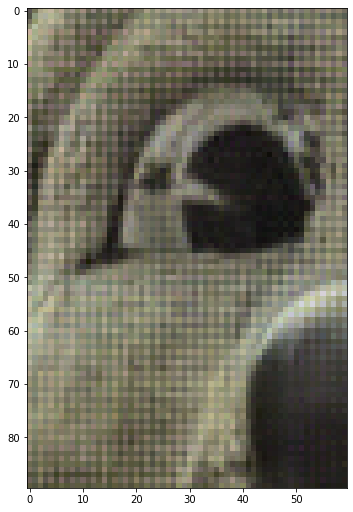

In [9]:
im = out[0].reshape(image.shape)
fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
ax.imshow(im)

In [7]:
out_10_b = nonten(X, Y, r, rng, lpar = 10, tol = 1e-6, verbose = True, indices=True, pattern=True, sparse=True, nag=False)


   Active Sets   |           Objective Bounds            |         Work
  Size    Drops  |  Incumbent       BestBd       AddGap  |  SiGD  IntPrg   Time

     2        0     2.879e-02    0.000e+00    2.879e-02        0      1      0s
     3        0     2.402e-02    0.000e+00    2.402e-02        0      1      0s
   123       16     1.201e-03    0.000e+00    1.201e-03      405      1      5s
   159       19     8.244e-04    0.000e+00    8.244e-04      426      1      7s
   159       19     7.737e-04    0.000e+00    7.737e-04     1130      1     12s
   166       20     7.265e-04    0.000e+00    7.265e-04     1839      1     17s
   172       22     6.724e-04    0.000e+00    6.724e-04     2558      1     22s
   181       23     6.221e-04    0.000e+00    6.221e-04     3229      1     27s
   187       24     5.934e-04    0.000e+00    5.934e-04     3752      1     32s
   193       24     5.718e-04    0.000e+00    5.718e-04     4290      1     37s
   198       25     5.450e-04    0.000e+00    

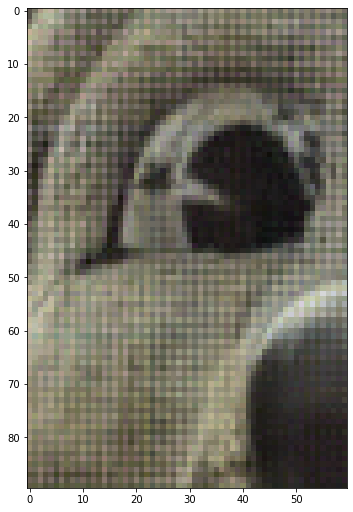

In [10]:
im = out_10_b[0].reshape(image.shape)
fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
ax.imshow(im)

In [8]:
out_10_c = nonten(X, Y, r, rng, lpar = 10, tol = 1e-6, verbose = True, indices=True, pattern=True, sparse=True, nag=True)


   Active Sets   |           Objective Bounds            |         Work
  Size    Drops  |  Incumbent       BestBd       AddGap  |  SiGD  IntPrg   Time

     2        0     2.879e-02    0.000e+00    2.879e-02        0      1      0s
     3        0     2.402e-02    0.000e+00    2.402e-02        0      1      0s
    51        0     3.529e-03    0.000e+00    3.529e-03      616      1      5s
   109        0     1.401e-03    0.000e+00    1.401e-03     1096      1     10s
   153        0     8.846e-04    0.000e+00    8.846e-04     1238      1     15s
   155        0     7.764e-04    0.000e+00    7.764e-04     1826      1     20s
   162        0     7.298e-04    0.000e+00    7.298e-04     2339      1     25s
   174        0     6.642e-04    0.000e+00    6.642e-04     2925      1     30s
   184        0     6.094e-04    0.000e+00    6.094e-04     3552      1     35s
   195        0     5.557e-04    0.000e+00    5.557e-04     4167      1     40s
   205        0     5.130e-04    0.000e+00    

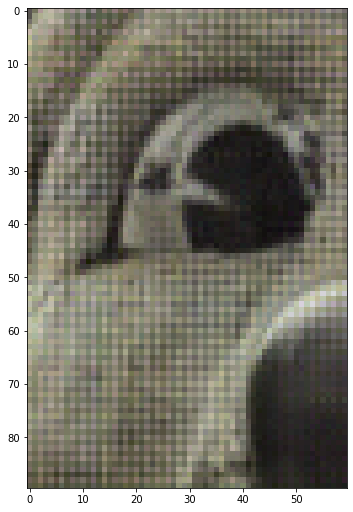

In [11]:
im = out_10_c[0].reshape(image.shape)
fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
ax.imshow(im)